In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from google.colab import drive

In [ ]:
drive.mount('/content/gdrive',force_remount = True)

Mounted at /content/gdrive


### 1. 데이터 분석


In [ ]:
train = pd.read_csv(r'./gdrive/MyDrive/data/BookRec/sample_data/train.csv')
print("before cnt : ",len(train))
train = train[train['Age']<=104]
print("total count(age<=104) : ",len(train))

before cnt :  871393
total count(age<=104) :  869534


In [ ]:
print(train.columns)
train = train[['ID','User-ID','Book-ID','Book-Rating','Age','Book-Title','Book-Author']]
print(train.columns)

Index(['ID', 'User-ID', 'Book-ID', 'Book-Rating', 'Age', 'Location',
       'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher'],
      dtype='object')
Index(['ID', 'User-ID', 'Book-ID', 'Book-Rating', 'Age', 'Book-Title',
       'Book-Author'],
      dtype='object')


In [ ]:
print(train['User-ID'].unique)
# print(group['ID'].count().value_counts())
group = train['User-ID'].value_counts()
print(group)
print(group.max())
print(group.min())
print(group.mean())

<bound method Series.unique of 0         USER_00000
1         USER_00000
2         USER_00000
3         USER_00000
4         USER_00000
             ...    
871388    USER_92096
871389    USER_92097
871390    USER_92098
871391    USER_92099
871392    USER_92100
Name: User-ID, Length: 869534, dtype: object>
USER_56601    11143
USER_54845     6456
USER_52453     5814
USER_73501     4290
USER_03411     3453
              ...  
USER_55802        1
USER_55803        1
USER_55805        1
USER_55806        1
USER_92100        1
Name: User-ID, Length: 83209, dtype: int64
11143
1
10.449999399103463


35.0    35444
26.0     1533
29.0     1522
25.0     1512
34.0     1502
        ...  
86.0        2
89.0        2
99.0        2
97.0        1
98.0        1
Name: Age, Length: 99, dtype: int64
83209


<Axes: >

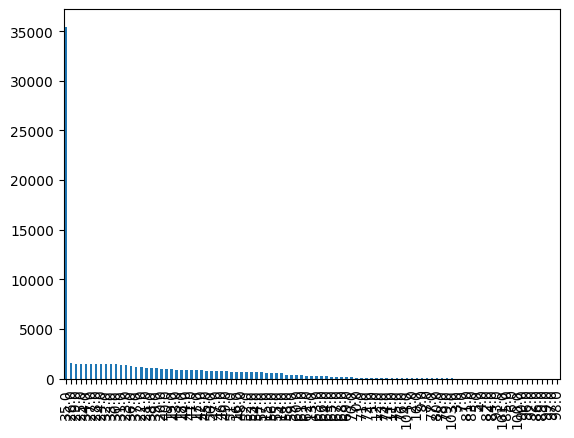

In [ ]:
unique_people = train.drop_duplicates(['User-ID'],inplace=False)['Age']
print(unique_people.value_counts())
print(len(unique_people))
unique_people.value_counts().plot(kind='bar')

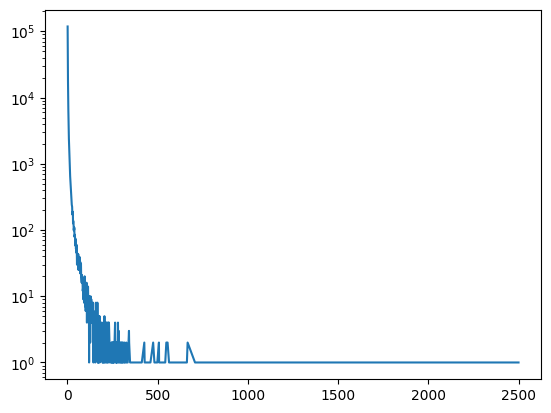

In [ ]:
title = train['Book-Title'].value_counts()
title_cnt = np.unique(title.values,return_counts=True )
plt.plot(title_cnt[0], title_cnt[1])
plt.yscale('log')

Stephen King           8439
Nora Roberts           6926
John Grisham           5273
James Patterson        5013
Mary Higgins Clark     3973
                       ... 
Matt Bloom                1
Cassie Kendall            1
Birney, M.D. Dibble       1
John G. Miller            1
Stephen Griffith          1
Name: Book-Author, Length: 92569, dtype: int64


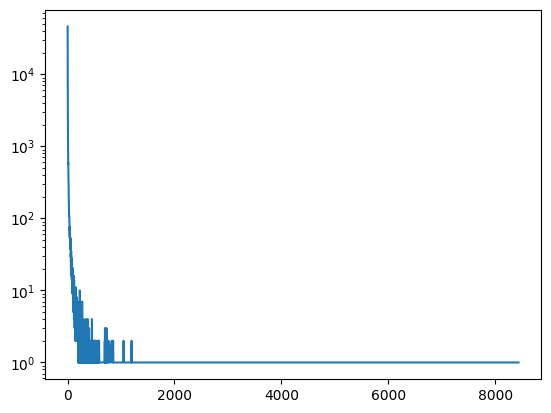

In [ ]:
author = train['Book-Author'].value_counts()
print(author)
author_cnt = np.unique(author.values,return_counts=True)
plt.plot(author_cnt[0],author_cnt[1])
plt.yscale('log')

#### 1-2. 데이터 분석 결과
User-ID : 0~92100의 번호, 1권에 대한 평점이 가장 많고 최대 1565개의 평점을 남긴 사람이 있다.  
Age : 0~140이상까지 다양함. 나이가 140이 넘어가는 이상치로 보이는 자료가 있어서 104이하의 값만 사용.
BookTitle : 대부분 1권당 1리뷰, 최대 2502 리뷰  
Book-Author : 대부분 1 작가당 1리뷰. 최대 8467 리뷰  


### 2. 데이터 접근  

#### 가설 1.
같은 작가를 많이 본 사람은 해당 작가에 대해서 비슷한 평점을 내릴 것

#### 가설 2.
같은 장르를 많이 본 사람은 해당 장르에 대해서 비슷한 평점을 내릴 것

#### 가설 3.
같은 책에 대해서는 비슷한 평점이 나올 것

#### 가설 4.
연령대 별로 작가/책에 대해서 비슷한 평점이 나올 것

In [ ]:
#가설 1.
book_author = train[['Book-ID','Book-Author']].drop_duplicates(['Book-Author','Book-ID']).value_counts()
author_group = train.groupby('Book-Author')
result = author_group['Book-Rating'].aggregate([np.mean,np.std])
print(result)
print(result.max())
print(result.min())
print(result.mean())

                            mean       std
Book-Author                               
 D. Chiel               2.500000  5.000000
"Abu"                   8.000000       NaN
"Beshlie"               6.000000       NaN
"Family Circle"         5.000000       NaN
"Good Housekeeping"     7.000000       NaN
...                          ...       ...
Â¢ystein LÂ²nn          7.000000       NaN
Ã?dÃ¶n von HorvÃ¡th     5.333333  4.618802
Ã?Â?dÃ?Â¶n von Horvath  5.000000  7.071068
Ã?Â?pictÃ?Â¨te          4.500000  6.363961
Ã?Â?ric Holder          0.000000  0.000000

[92569 rows x 2 columns]
mean    10.000000
std      7.071068
dtype: float64
mean    0.0
std     0.0
dtype: float64
mean    2.990929
std     2.984292
dtype: float64


평점에 대한 표준편차는 0에서 7.0으로 약 3이 평균이다
그러므로, 표준편차가 3 이상인 데이터에 대해서는 저자에 대한 평균 평점을 넣지 않는다.

In [ ]:
#가설 2.
#코드가 사라진 관계로 가설2,3,4는 생략

In [ ]:
!pip install surprise
from surprise import SVD, Dataset, Reader, accuracy

In [ ]:
authors = train['Book-Author'].unique()
print(authors)
print(len(authors))

['Rona Jaffe' 'William Shakespeare' 'Walter Scott' ... 'Jamie Buckingham'
 'Mary Newton Bruder' 'Stephen Griffith']
92569


In [ ]:
book_ids = train['Book-ID'].unique()
print(book_ids)
print(len(book_ids))

['BOOK_044368' 'BOOK_081205' 'BOOK_086781' ... 'BOOK_265220' 'BOOK_266941'
 'BOOK_130798']
243258


In [ ]:
from tqdm import tqdm
import os

if os.path.exists('./gdrive/MyDrive/data/BookRec/sample_data/author_id_dict.pkl'):
  with open('./gdrive/MyDrive/data/BookRec/sample_data/author_id_dict.pkl', 'rb') as f:
    author_id_dict=pickle.load(f)
    print("load exist dict")
else:
  print('make new dictionary')
  author_id_dict = {}
  train_temp = train.drop_duplicates(['Book-Author','Book-ID'])[['Book-Author','Book-ID']]
  for author in tqdm(authors):
    book_ids_for_author = train_temp[train_temp['Book-Author'] == author]['Book-ID'].tolist()
    author_id_dict[author] = book_ids_for_author

  print(author_id_dict)


load exist dict


In [ ]:

import pickle

with open('./gdrive/MyDrive/data/BookRec/sample_data/author_id_dict.pkl', 'wb') as f:
  pickle.dump(author_id_dict, f)


In [ ]:

grouped_data = train.groupby('Book-Author')
filtered_data = grouped_data.filter(lambda x: len(x) >= 5)


In [ ]:
train_grouped = train.groupby('Book-Author')
train_grouped = train_grouped.filter(lambda x: len(x)>=5).groupby("Book-Author")
train_author = train_grouped['Book-Rating'].std()
print(train_author)
print(train_author.mean())

Book-Author
"Pickles"              4.634241
A A Milne              4.939636
A Adams                0.000000
A Bodenburg Sommer     3.401680
A'Lelia Bundles        3.401680
                         ...   
dc Talk                5.128353
jr., Richard Herman    0.000000
stephen R Donaldson    3.923985
tk                     3.265986
unknown                4.423961
Name: Book-Rating, Length: 19284, dtype: float64
3.4598925893427874


In [ ]:

# 그룹화된 데이터프레임을 생성합니다.
grouped_df = train.groupby(['User-ID','Book-Author'])
# 각 사용자에 대해서 같은 Book-Author에 대한 평점이 3개 이상인지 확인합니다.
user_author_counts = grouped_df.filter(lambda x:len(x)>=3)
print(user_author_counts.groupby('User-ID')['Book-Author'].value_counts())



123
User-ID     Book-Author             
USER_00003  John Grisham                8
            Arthur C. Clarke            3
USER_00023  Cormac McCarthy             3
USER_00049  Gertrude Chandler Warner    7
USER_00050  V.C. Andrews                3
                                       ..
USER_92093  John Grisham                3
            Julie Garwood               3
            Junior League of Denver     3
            Kathleen E. Woodiwiss       3
            Luci Swindoll               3
Name: Book-Author, Length: 32119, dtype: int64


In [ ]:
uac = user_author_counts[['User-ID','Book-Author','Book-ID']]
print(uac)


           User-ID              Book-Author      Book-ID
13      USER_00003         Arthur C. Clarke  BOOK_017583
14      USER_00003             John Grisham  BOOK_047847
21      USER_00003             John Grisham  BOOK_179881
22      USER_00003             John Grisham  BOOK_186972
24      USER_00003             John Grisham  BOOK_210867
...            ...                      ...          ...
871375  USER_92093             Bodie Thoene  BOOK_263802
871379  USER_92093       Maud Hart Lovelace  BOOK_265837
871380  USER_92093  Junior League of Denver  BOOK_266941
871382  USER_92093             Bodie Thoene  BOOK_267657
871384  USER_92093              Janette Oke  BOOK_268377

[159089 rows x 3 columns]


In [ ]:
user_author_dict = {}
temp = uac[['User-ID','Book-Author']].value_counts()
cnt= 0
for (userid, author),_ in temp.items():
  cnt +=1
  if userid not in user_author_dict:
    user_author_dict[userid] = []
  user_author_dict[userid].append(author)


In [153]:
print(train.head(3))

             ID     User-ID      Book-ID  Book-Rating   Age  \
0  TRAIN_000000  USER_00000  BOOK_044368            8  23.0   
1  TRAIN_000001  USER_00000  BOOK_081205            8  23.0   
2  TRAIN_000002  USER_00000  BOOK_086781            0  23.0   

                           Book-Title          Book-Author  
0                          Road Taken           Rona Jaffe  
1   Macbeth (New Penguin Shakespeare)  William Shakespeare  
2  Waverley (Penguin English Library)         Walter Scott  


In [ ]:
append_list = []
for user_id in user_author_dict:
  for book in author_id_dict:
    if book not in user_author_dict[user_id]:
      append_list.append({'User-ID':user_id,'Book-ID':book,'Book_Rating':3})

print(append_list)
